# Make Features

**Import needed Libraries**

In [138]:
import pandas as pd
import numpy as np
import math
from datetime import datetime

### Making New Features with M&M Dataset

In [139]:
url = 'https://tinyurl.com/mms-statistics'

df = pd.read_csv(url)

df.head()

,type,color,diameter,mass
0,peanut butter,blue,16.20,2.18
1,peanut butter,brown,16.50,2.01
2,peanut butter,orange,15.48,1.78
3,peanut butter,brown,16.32,1.98
4,peanut butter,yellow,15.59,1.62


**Creating new features for M&M dataset**
- volumne
- density
- radius
- circumference

In [140]:
# Equation for volume
df['volume'] = (4/3)*(3.14)*((df['diameter'])/10*2)**3

# Equation for density
df['density'] = df['mass']/df['volume']

# Equation for radis
df['radius'] = df['diameter']/2

# Equation for circumference
df['circumference'] = 2 * math.pi * df['radius']

df.head()

,type,color,diameter,mass,volume,density,radius,circumference
0,peanut butter,blue,16.20,2.18,142.397844,0.015309,8.100,50.893801
1,peanut butter,brown,16.50,2.01,150.456240,0.013359,8.250,51.836279
2,peanut butter,orange,15.48,1.78,124.242803,0.014327,7.740,48.631854
3,peanut butter,brown,16.32,1.98,145.585739,0.013600,8.160,51.270792
4,peanut butter,yellow,15.59,1.62,126.910255,0.012765,7.795,48.977429


### Modifying String Data in UFO Dataset

In [141]:
path = "data/ufo-data.csv"

ufo_df = pd.read_csv(path)

ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [142]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [143]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


**Modifiying string data on UFO dataset**
- title()
- upper()
- lower()
- strip()
- split()
- len()

In [144]:
# Modifying strings in the dataset using basic methods
ufo_df['city'] = ufo_df['city'].str.title()
ufo_df['state'] = ufo_df['state'].str.upper()
ufo_df['country'] = ufo_df['country'].str.upper()
ufo_df['shape'] = ufo_df['shape'].str.lower()
ufo_df['duration (hours/min)'] = ufo_df['duration (hours/min)'].str.strip()
ufo_df['date posted'] = ufo_df['date posted'].str.split('/')

# Feature based on how many characters are in comments string
ufo_df['comments length'] = ufo_df['comments'].str.len()

# Sorting dataset records from oldest to newest
ufo_df = ufo_df.sort_values('datetime')

# Renaming column name to make more sense
ufo_df = ufo_df.rename(columns={'duration (hours/min)': 'eastimated duration time'})
ufo_df = ufo_df.rename(columns={'longitude ': 'longitude'})

ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),eastimated duration time,comments,date posted,latitude,longitude,comments length
10580,1/1/1910 24:00,Kirksville (Near),MO,US,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,"[9, 15, 2005]",40.1947222,-92.583056,51.0
10813,1/1/1944 12:00,San Diego,CA,US,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,"[7, 25, 2004]",32.7152778,-117.156389,135.0
10814,1/1/1947 17:00,Manama (Bahrain),NaN,NaN,circle,300,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,"[3, 19, 2009]",26.216667,50.583333,91.0
10815,1/1/1953 14:00,Oklahoma/Texas Border,TX,NaN,cigar,300,5 minutes,Copper cigar-shaped object in early 1950&#39s.,"[3, 31, 2008]",33.660135,-97.715556,46.0
10816,1/1/1953 24:00,Nebraska (Rural),NE,NaN,NaN,600,10 min,This is an account told to me by my mother tha...,"[4, 16, 2005]",41.492537,-99.901813,141.0


**Scatter Plot of UFO Dataset Coordnates**
- roughly makes out map of the world, can see were the reports are mostly from

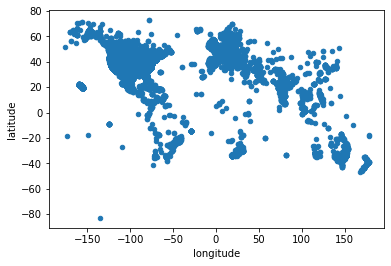

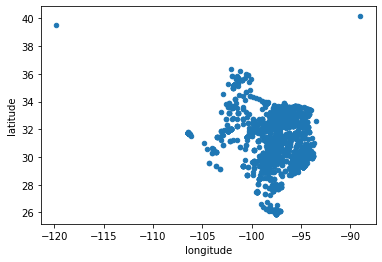

In [145]:
# Dropping one row that has mistyped information
ufo_df = ufo_df[ufo_df['latitude'] != '33q.200088']

# Converting the latitude feature to a float type
ufo_df['latitude'] = ufo_df['latitude'].astype(str).astype(float)

# Plotting the longitude and latitude data
ufo_df.plot.scatter(x='longitude', y='latitude');

# Creating subset of cases just in texas
texas_df = ufo_df[ufo_df['state'] == 'TX']

# Plotting the longitude and latitude data
texas_df.plot.scatter(x='longitude', y='latitude');

### Modifying Numerical Data in Dataframe

In [146]:
# Multiply by 7
def times_seven(x):
    return x * 7

# Creating a small datarame of numbers
df = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

print('Original DataFrame')
display(df)

# Applying the function to the dataframe
df = df.apply(times_seven, axis=1)
print('Modified DataFrame')
display(df)

Original DataFrame


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


Modified DataFrame


,a,b,c,d
0,0.0,7.0,14.0,21.0
1,28.0,35.0,42.0,49.0
2,56.0,63.0,70.0,77.0


### Modifying numerical data on UFO dataset
- using .apply()

In [147]:
path = "data/ufo-data.csv"

ufo_df = pd.read_csv(path)

# Sorting dataset records from oldest to newest
ufo_df = ufo_df.sort_values('datetime')

ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10580,1/1/1910 24:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
10813,1/1/1944 12:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389
10814,1/1/1947 17:00,manama (bahrain),NaN,NaN,circle,300,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,3/19/2009,26.216667,50.583333
10815,1/1/1953 14:00,oklahoma/texas border,tx,NaN,cigar,300,5 minutes,Copper cigar-shaped object in early 1950&#39s.,3/31/2008,33.660135,-97.715556
10816,1/1/1953 24:00,nebraska (rural),ne,NaN,NaN,600,10 min,This is an account told to me by my mother tha...,4/16/2005,41.492537,-99.901813


**Using the .apply() methode on the diration feature**

In [148]:
# Remove ` from string so it can be convered to floating point`
def remove_artifact(a):
    if isinstance(a, str):
        return a.replace('`', '')
    return a

# Novice Seconds to Minutes conversion
def sec_to_min(s):
    min = s/60
    return min

# Process of cleaning, converting, and modying the Duration feature 
ufo_df['duration (seconds)'] = ufo_df['duration (seconds)'].apply(remove_artifact)
ufo_df['duration (seconds)'] = ufo_df['duration (seconds)'].astype(str).astype(float)
# Converting from seconds to minutes
ufo_df['duration (seconds)'] = ufo_df['duration (seconds)'].apply(sec_to_min)
ufo_df = ufo_df.rename(columns={'duration (seconds)': 'duration (minute)'})

ufo_df.head()

,datetime,city,state,country,shape,duration (minute),duration (hours/min),comments,date posted,latitude,longitude
10580,1/1/1910 24:00,kirksville (near),mo,us,disk,2.0,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
10813,1/1/1944 12:00,san diego,ca,us,cigar,3.0,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389
10814,1/1/1947 17:00,manama (bahrain),NaN,NaN,circle,5.0,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,3/19/2009,26.216667,50.583333
10815,1/1/1953 14:00,oklahoma/texas border,tx,NaN,cigar,5.0,5 minutes,Copper cigar-shaped object in early 1950&#39s.,3/31/2008,33.660135,-97.715556
10816,1/1/1953 24:00,nebraska (rural),ne,NaN,NaN,10.0,10 min,This is an account told to me by my mother tha...,4/16/2005,41.492537,-99.901813


### Working with the DateTime Object
- built in python datetime object
- pandas's timestamp object

**DateTime Practice**

In [149]:
# Python built in DateTime object
print("Python Datetime: ", datetime(year=2017, month=8, day=21))
print('')
# Pandas's TimeStamp
print("Pandas's TimeStamp: ", pd.to_datetime("21st of August, 2017"))
print('')

date = pd.to_datetime("16th of July, 1999")
print(date.month)
print(date.day)
print(date.year)

Python Datetime:  2017-08-21 00:00:00

Pandas's TimeStamp:  2017-08-21 00:00:00

7
16
1999


**TimeStamp and UFO Dataset**

In [150]:
path = "data/ufo-data.csv"

ufo_df = pd.read_csv(path)

# Sorting dataset records from oldest to newest
ufo_df = ufo_df.sort_values('datetime')

def time_fix(x):
    if '24:00' in x:
        x = x.replace('24:00', '00:00')
    return x

ufo_df['datetime'] = ufo_df['datetime'].apply(time_fix)

ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10580,1/1/1910 00:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
10813,1/1/1944 12:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389
10814,1/1/1947 17:00,manama (bahrain),NaN,NaN,circle,300,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,3/19/2009,26.216667,50.583333
10815,1/1/1953 14:00,oklahoma/texas border,tx,NaN,cigar,300,5 minutes,Copper cigar-shaped object in early 1950&#39s.,3/31/2008,33.660135,-97.715556
10816,1/1/1953 00:00,nebraska (rural),ne,NaN,NaN,600,10 min,This is an account told to me by my mother tha...,4/16/2005,41.492537,-99.901813


**Converting object type to Datetime object in UFO dataset**

In [151]:
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'][1:], infer_datetime_format=True)
print(ufo_df['datetime'].head())

10580                   NaT
10813   1944-01-01 12:00:00
10814   1947-01-01 17:00:00
10815   1953-01-01 14:00:00
10816   1953-01-01 00:00:00
Name: datetime, dtype: datetime64[ns]
